<a href="https://colab.research.google.com/github/sharinair14/Python-programs/blob/master/Bank_Marketing_dataset_using_Logistics_regression_with_RFE_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [8]:
banking=pd.read_csv('/content/banking.csv')

In [9]:
banking.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [10]:
banking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [11]:
banking.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [12]:
banking.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [13]:
banking.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [14]:
banking.groupby('education')['y'].value_counts()

education            y
basic.4y             0     3748
                     1      428
basic.6y             0     2104
                     1      188
basic.9y             0     5572
                     1      473
high.school          0     8484
                     1     1031
illiterate           0       14
                     1        4
professional.course  0     4648
                     1      595
university.degree    0    10498
                     1     1670
unknown              0     1480
                     1      251
Name: y, dtype: int64

In [15]:
banking.education[banking.education == 'basic.4y'] = 'Basic'
banking.education[banking.education == 'basic.6y'] = 'Basic'
banking.education[banking.education == 'basic.9y'] = 'Basic'
banking.education[banking.education == 'high.school'] = 'High school'
banking.education[banking.education == 'illiterate'] = 'Illiterate'
banking.education[banking.education == 'professional.course'] = 'Professional course'
banking.education[banking.education == 'university.degree'] = 'University degree'
banking.education[banking.education == 'unknown'] = 'Unknown'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [16]:
banking.groupby('education')['y'].value_counts()

education            y
Basic                0    11424
                     1     1089
High school          0     8484
                     1     1031
Illiterate           0       14
                     1        4
Professional course  0     4648
                     1      595
University degree    0    10498
                     1     1670
Unknown              0     1480
                     1      251
Name: y, dtype: int64

In [17]:
pd.crosstab(banking['education'],banking['y'])

y,0,1
education,,
Basic,11424,1089
High school,8484,1031
Illiterate,14,4
Professional course,4648,595
University degree,10498,1670
Unknown,1480,251


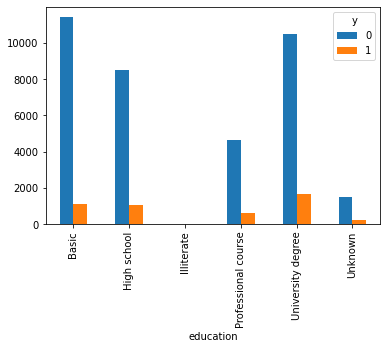

In [18]:
pd.crosstab(banking['education'],banking['y']).plot(kind='bar')

In [19]:
pd.crosstab(banking['job'],banking['y'])

y,0,1
job,,
admin.,9070,1352
blue-collar,8616,638
entrepreneur,1332,124
housemaid,954,106
management,2596,328
retired,1286,434
self-employed,1272,149
services,3646,323
student,600,275


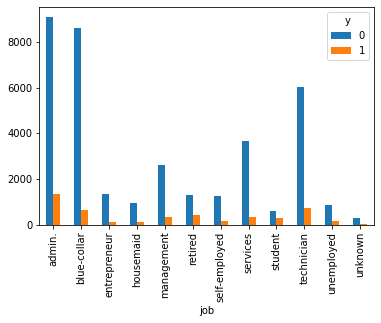

In [20]:
pd.crosstab(banking['job'],banking['y']).plot(kind='bar')

In [21]:
pd.crosstab(banking['marital'],banking['y'])

y,0,1
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


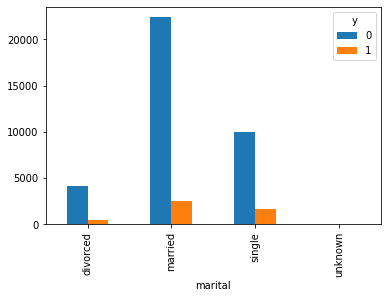

In [22]:
pd.crosstab(banking['marital'],banking['y']).plot(kind='bar')

In [23]:
pd.crosstab(banking['housing'],banking['y'])

y,0,1
housing,,
no,16596,2026
unknown,883,107
yes,19069,2507


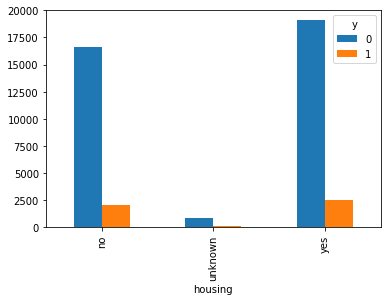

In [24]:
pd.crosstab(banking['housing'],banking['y']).plot(kind='bar')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


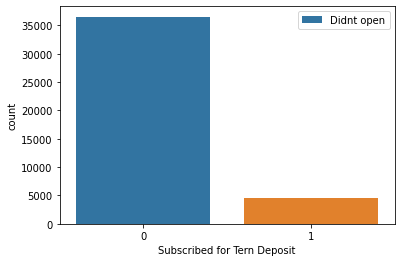

In [25]:
sns.countplot(banking['y'])
plt.xlabel('Subscribed for Tern Deposit')
plt.legend(labels=['Didnt open','Opened'])

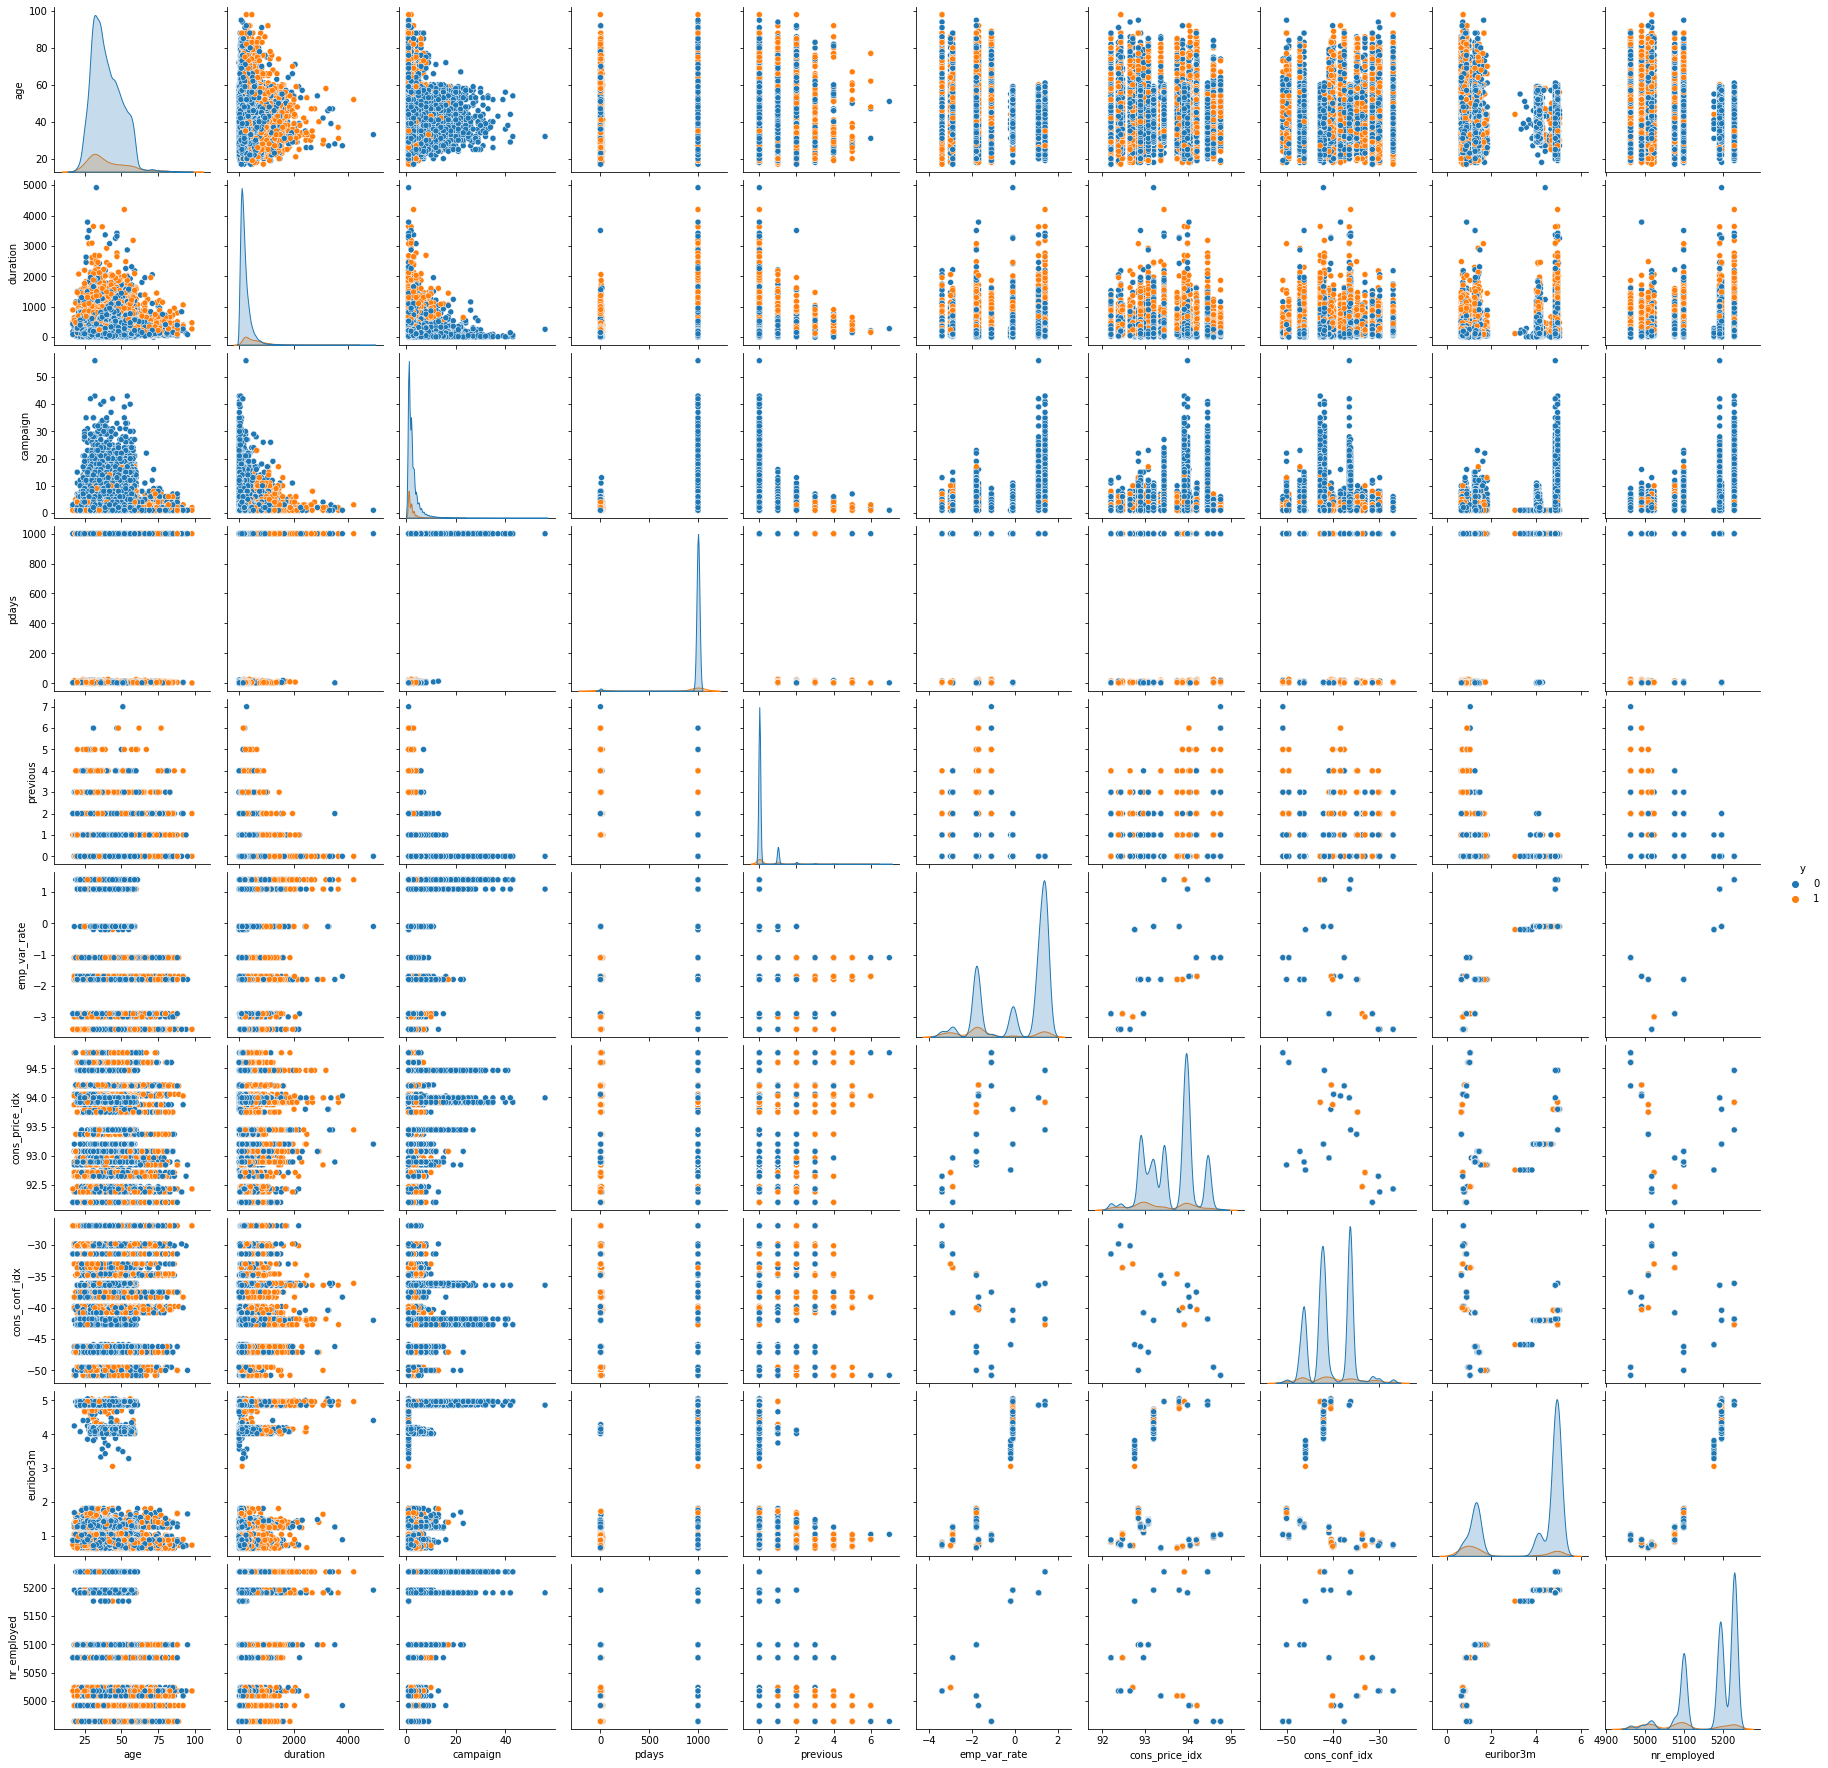

In [26]:
#sns.pairplot(data=banking,hue='y')

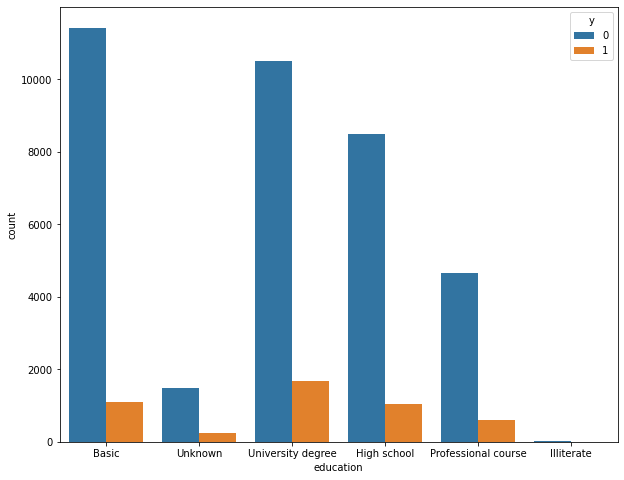

In [27]:
plt.figure(figsize=(10,8))
sns.countplot(x='education',hue='y',data=banking)

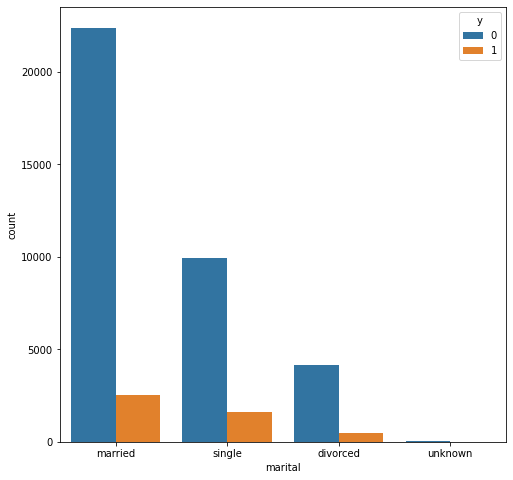

In [28]:
plt.figure(figsize=(8,8))
sns.countplot(x='marital',hue='y',data=banking)

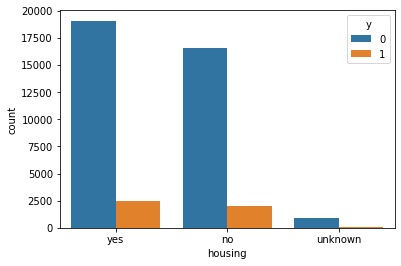

In [29]:
sns.countplot(x='housing',hue='y',data=banking)


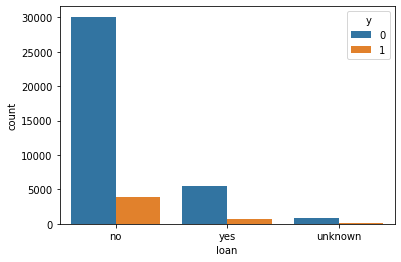

In [30]:
sns.countplot(x='loan',hue='y',data=banking)


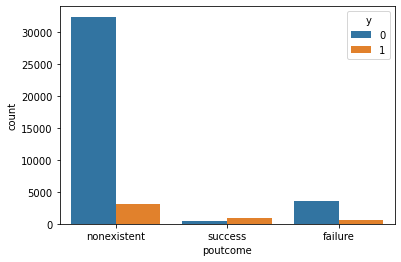

In [31]:
sns.countplot(x='poutcome',hue='y',data=banking)


select numeric and categorical datatypes


In [32]:
numeric_dtypes = banking.select_dtypes(exclude=object)


Text(0.5, 1.0, 'Correlation Matrix')

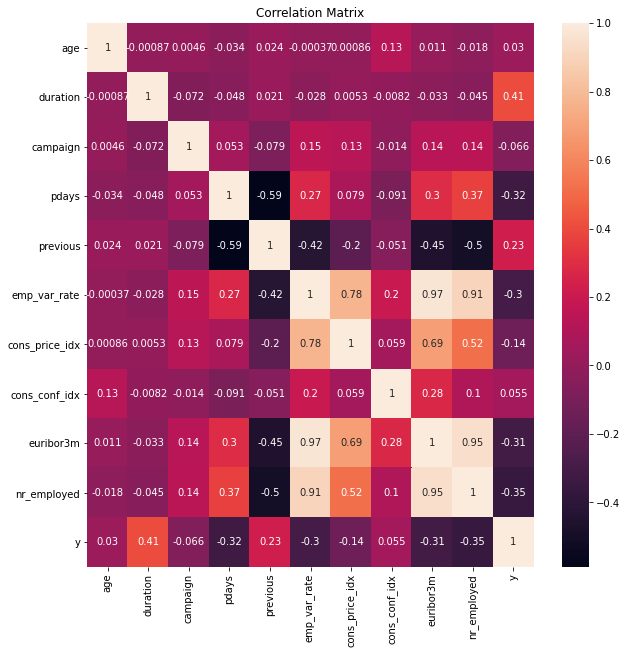

In [33]:
plt.figure(figsize=(10,10))
sns.heatmap(numeric_dtypes.corr(),annot=True)
plt.title('Correlation Matrix')

Creating Dummy Variable


In [34]:
cat_col=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']

In [35]:
for col in cat_col:
  banking=pd.concat([banking.drop(col,axis=1),pd.get_dummies(banking[col],prefix=col,prefix_sep='-',drop_first=True)],axis=1)

In [36]:
banking.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,job-blue-collar,job-entrepreneur,job-housemaid,job-management,job-retired,job-self-employed,job-services,job-student,job-technician,job-unemployed,job-unknown,marital-married,marital-single,marital-unknown,education-High school,education-Illiterate,education-Professional course,education-University degree,education-Unknown,default-unknown,default-yes,housing-unknown,housing-yes,loan-unknown,loan-yes,contact-telephone,month-aug,month-dec,month-jul,month-jun,month-mar,month-may,month-nov,month-oct,month-sep,day_of_week-mon,day_of_week-thu,day_of_week-tue,day_of_week-wed,poutcome-nonexistent,poutcome-success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


Splitting the data


In [37]:
X = banking.drop('y',axis=1)

In [38]:
y=banking['y']

Modelling


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve

In [40]:
lr=LogisticRegression()

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [42]:
X_train.shape

(28831, 51)

In [43]:
y_train.shape

(28831,)

In [44]:
lr.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
y_pred=lr.predict(X_test)

In [46]:
print("Accuracy score is : ",accuracy_score(y_test,y_pred))

Accuracy score is :  0.9116290361738286


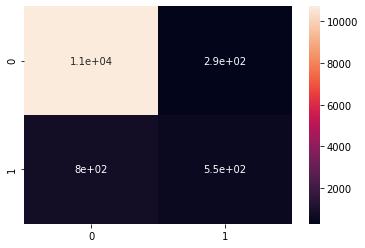

In [47]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [48]:
print("Confusion Matrix is : ",confusion_matrix(y_test,y_pred))

Confusion Matrix is :  [[10713   293]
 [  799   552]]


In [49]:
print("Classification Report is :",classification_report(y_test,y_pred))

Classification Report is :               precision    recall  f1-score   support

           0       0.93      0.97      0.95     11006
           1       0.65      0.41      0.50      1351

    accuracy                           0.91     12357
   macro avg       0.79      0.69      0.73     12357
weighted avg       0.90      0.91      0.90     12357



In [50]:
probs=lr.predict_proba(X_test)

In [51]:
probs

array([[0.97894678, 0.02105322],
       [0.72935299, 0.27064701],
       [0.988294  , 0.011706  ],
       ...,
       [0.98871785, 0.01128215],
       [0.99262754, 0.00737246],
       [0.92118379, 0.07881621]])

In [52]:
prob=probs[:,1]

In [53]:
prob

array([0.02105322, 0.27064701, 0.011706  , ..., 0.01128215, 0.00737246,
       0.07881621])

In [54]:
print("AUC is ",roc_auc_score(y_test,prob))

AUC is  0.9215296467723076


Text(0, 0.5, 'TPR')

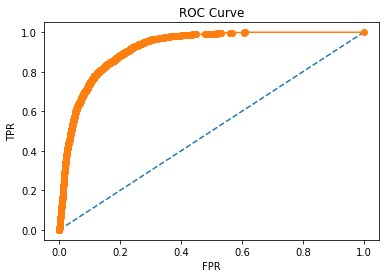

In [55]:
fpr,tpr,_ = roc_curve(y_test,prob)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='o')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")

RFE (Recursive Feature Elimination
)

In [56]:
from sklearn.feature_selection import RFE

In [57]:
rfe = RFE(lr,30)

In [58]:
rfe.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=30, step=1, verbose=0)

In [59]:
print(rfe.support_)

[False False  True False  True  True False  True  True False  True  True
 False False  True False  True  True False False False False  True False
  True False False  True  True  True False False False False False  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True]


In [60]:
print(rfe.ranking_)

[13 11  1 17  1  1  3  1  1  6  1  1 15 16  1 18  1  1  2  8 20  4  1 21
  1 19  5  1  1  1 22 10  9 12  7  1  1  1  1  1  1  1  1  1 14  1  1  1
  1  1  1]


In [61]:
X.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job-blue-collar,job-entrepreneur,job-housemaid,job-management,job-retired,job-self-employed,job-services,job-student,job-technician,job-unemployed,job-unknown,marital-married,marital-single,marital-unknown,education-High school,education-Illiterate,education-Professional course,education-University degree,education-Unknown,default-unknown,default-yes,housing-unknown,housing-yes,loan-unknown,loan-yes,contact-telephone,month-aug,month-dec,month-jul,month-jun,month-mar,month-may,month-nov,month-oct,month-sep,day_of_week-mon,day_of_week-thu,day_of_week-tue,day_of_week-wed,poutcome-nonexistent,poutcome-success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [62]:
selected_feature=['campaign','previous','emp_var_rate','cons_conf_idx','euribor3m','job-blue-collar','job-entrepreneur','job-retired','job-services','job-student','marital-single','education-High school','education-University degree','education-Unknown','default-unknown','loan-yes','contact-telephone','month-aug','month-dec','month-jul','month-jun','month-mar','month-may','month-nov','month-oct','day_of_week-mon','day_of_week-thu','day_of_week-tue','day_of_week-wed','poutcome-nonexistent','poutcome-success']

In [63]:
x1=banking[selected_feature]

In [64]:
x1.head()

,campaign,previous,emp_var_rate,cons_conf_idx,euribor3m,job-blue-collar,job-entrepreneur,job-retired,job-services,job-student,marital-single,education-High school,education-University degree,education-Unknown,default-unknown,loan-yes,contact-telephone,month-aug,month-dec,month-jul,month-jun,month-mar,month-may,month-nov,month-oct,day_of_week-mon,day_of_week-thu,day_of_week-tue,day_of_week-wed,poutcome-nonexistent,poutcome-success
0,1,0,1.4,-36.1,4.963,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
1,1,0,-0.1,-42.0,4.021,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,3,2,-1.7,-39.8,0.729,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
3,2,0,-1.8,-47.1,1.405,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,1,-2.9,-31.4,0.869,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [65]:
y1=banking['y']

Implementing the model


In [66]:
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [67]:
logit_model = sm.Logit(y1,x1)

In [68]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.279761
         Iterations 7


In [69]:
print(result.summary2())

                               Results: Logit
Model:                   Logit               Pseudo R-squared:    0.205     
Dependent Variable:      y                   AIC:                 23107.6020
Date:                    2020-10-17 09:57    BIC:                 23375.0050
No. Observations:        41188               Log-Likelihood:      -11523.   
Df Model:                30                  LL-Null:             -14499.   
Df Residuals:            41157               LLR p-value:         0.0000    
Converged:               1.0000              Scale:               1.0000    
No. Iterations:          7.0000                                             
----------------------------------------------------------------------------
                             Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------
campaign                    -0.0484   0.0091  -5.3008 0.0000 -0.0664 -0.0305
previous                     0

In [70]:
select_feature=['campaign','previous','emp_var_rate','cons_conf_idx','euribor3m','job-blue-collar','job-retired','job-student','education-University degree','default-unknown','contact-telephone','month-dec','month-jul','month-jun','month-mar','month-may','month-oct','day_of_week-mon','day_of_week-wed','poutcome-nonexistent','poutcome-success']

In [71]:
x2=banking[select_feature]

In [72]:
y2=banking['y']

In [73]:
logit_model1=sm.Logit(y2,x2)

In [74]:
result1=logit_model1.fit()

Optimization terminated successfully.
         Current function value: 0.279906
         Iterations 7


In [75]:
print(result1.summary2())

                               Results: Logit
Model:                   Logit               Pseudo R-squared:    0.205     
Dependent Variable:      y                   AIC:                 23099.5365
Date:                    2020-10-17 09:57    BIC:                 23280.6804
No. Observations:        41188               Log-Likelihood:      -11529.   
Df Model:                20                  LL-Null:             -14499.   
Df Residuals:            41167               LLR p-value:         0.0000    
Converged:               1.0000              Scale:               1.0000    
No. Iterations:          7.0000                                             
----------------------------------------------------------------------------
                             Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------
campaign                    -0.0490   0.0091  -5.3711 0.0000 -0.0669 -0.0312
previous                     0

In [76]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.3,random_state=101)

In [77]:
lr.fit(x2_train,y2_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
y2_pred=lr.predict(x2_test)

In [79]:
print("Accuracy is ",accuracy_score(y2_test,y2_pred))

Accuracy is  0.9020797928299749


In [80]:
cm1=confusion_matrix(y2_test,y2_pred)

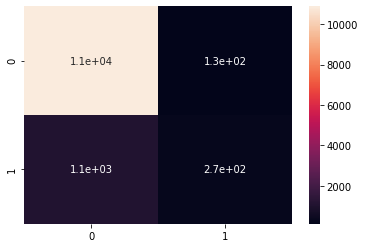

In [81]:
sns.heatmap(cm1,annot=True)

In [82]:
print("Confusion Matrix is : ",confusion_matrix(y2_test,y2_pred))

Confusion Matrix is :  [[10875   131]
 [ 1079   272]]


In [83]:
print("Classification Report is :",classification_report(y2_test,y2_pred))

Classification Report is :               precision    recall  f1-score   support

           0       0.91      0.99      0.95     11006
           1       0.67      0.20      0.31      1351

    accuracy                           0.90     12357
   macro avg       0.79      0.59      0.63     12357
weighted avg       0.88      0.90      0.88     12357

